(1465, 16)
Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹1

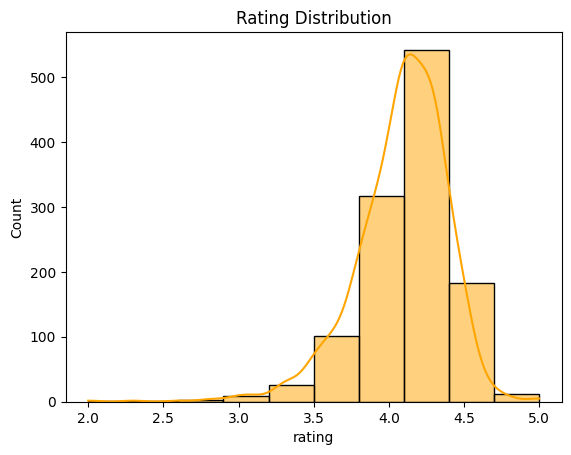

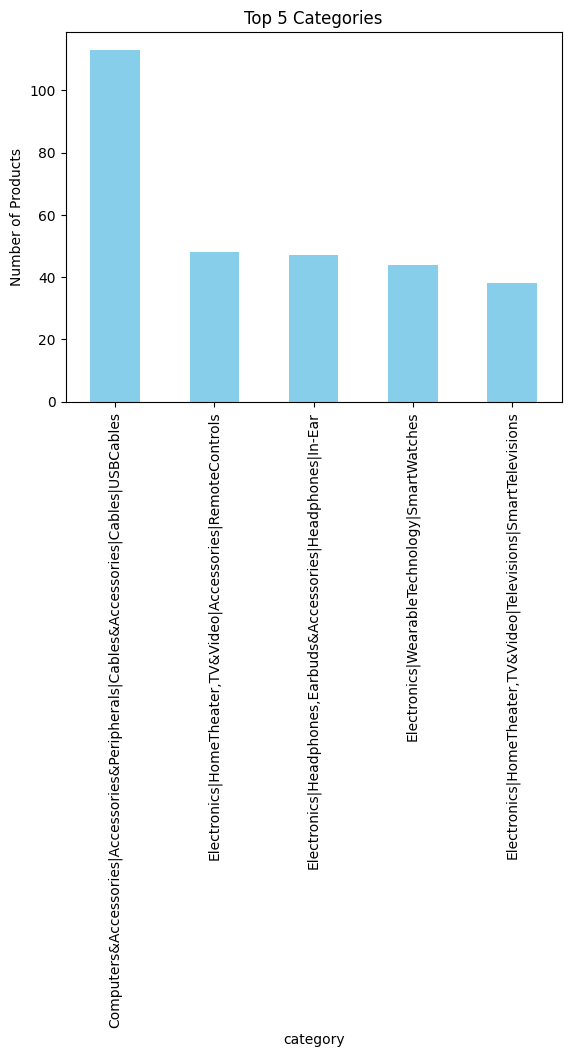

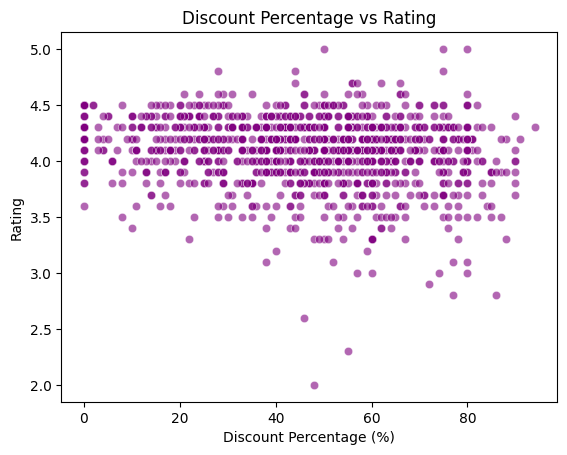

Outliers Detected: 19
Avg Rating per Category category
Computers&Accessories|Tablets                                   4.6
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients    4.5
OfficeProducts|OfficeElectronics|Calculators|Basic              4.5
Home&Kitchen|CraftMaterials|PaintingMaterials                   4.5
Computers&Accessories|Components|Memory                         4.5
Name: rating, dtype: float64
 Sample Data from SQL:
('Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)', 4.2)
('Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)', 4.0)
('Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices', 3.9)
('boAt Deuce USB 300 2 in 1 Type

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3




#csv file load
df=pd.read_csv('amazon.csv')
print(df.shape)
print(df.columns)
print(df.head())
print(df.isnull().sum())


#data cleaning
df['discounted_price']=df['discounted_price'].replace('[₹$,]', '', regex=True).astype(float)
df['actual_price']=df['actual_price'].replace('[₹$,]', '', regex=True).astype(float)
df['rating']=pd.to_numeric(df['rating'],errors='coerce')

#data handling
df.fillna({

    'rating':df['rating'].mean(),
    'rating_count':0
},inplace=True)


df.drop_duplicates(subset=['review_id'],inplace=True)

# Basic statistics
print('Rating status:')
print('Mean:',df['rating'].mean())
print('Median:',df['rating'].median())
print('Standard Deviation:',df['rating'].std())


#EDA
print('DataSet Info:')
print(df.info())
print(df.describe())


# Visualizations


#Rating Distribution


sns.histplot(df['rating'], bins=10, kde=True, color='orange')
plt.title("Rating Distribution")
plt.show()


#Top 5 categories

top_cat=df['category'].value_counts().head(5)
top_cat.plot(kind='bar',color='skyblue',title='Top 5 Categories')
plt.ylabel('Number of Top Five Products')
plt.show()


#discounted vs rating

df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

sns.scatterplot(x=df['discount_percentage'], y=df['rating'], color='purple', alpha=0.6)
plt.title("Discount Percentage vs Rating")
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Rating")
plt.show()


#outliers detection
Q1=df['rating'].quantile(0.25)
Q3=df['rating'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['rating'] < Q1 - 1.5*IQR) | (df['rating'] > Q3 + 1.5*IQR)]
print('Outliers Detected:', outliers.shape[0])

#Data Wrangling - Average Rating per Category

avg_rating=df.groupby('category')['rating'].mean().sort_values(ascending=False).head()
print('Avg Rating per Category',avg_rating)


conn=sqlite3.connect('amazon.db')
df.to_sql('products',conn,if_exists='replace',index=False)

cursor=conn.cursor()

cursor.execute('SELECT product_name, rating FROM products LIMIT 5')

print(' Sample Data from SQL:')

for row in cursor.fetchall():
    print(row)

conn.close()    





















